<a href="https://colab.research.google.com/github/RAHUL-REDDY-A/ML/blob/main/ml_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML_lab_05\
**reg no:bl.en.u4cse23102**

A1. If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_train) for training a linear regression model. Sample code suggested below. from sklearn.linear_model import LinearRegression reg = LinearRegression().fit(X_train, y_train) y_train_pred = reg.predict(X_train)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and drop any rows with missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names to convert into numeric form
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Loop through each categorical feature and apply label encoding
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_feature_and_target(df, feat_name, tgt_name):
    # Extract the chosen feature column as a 2D array
    X = df[[feat_name]].values

    # Extract the chosen target column as a 1D array
    y = df[tgt_name].values

    # Standardize the feature values for better performance in training
    scl = StandardScaler()
    X_scl = scl.fit_transform(X)

    # Split the dataset into training and testing subsets
    return train_test_split(X_scl, y, test_size=0.3, random_state=42)

def train_simple_linear_regression(X_tr, y_tr):
    # Create and fit a simple linear regression model
    mdl = LinearRegression()
    mdl.fit(X_tr, y_tr)
    return mdl

if __name__ == "__main__":
    # Load and encode the dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare the 'Age' feature and 'Stress Level' target
    X_tr, X_te, y_tr, y_te = prepare_feature_and_target(
        df, feat_name="Age", tgt_name="Stress_Level"
    )

    # Train the simple linear regression model
    mdl = train_simple_linear_regression(X_tr, y_tr)

    # Output model results
    print("Coefficient:", mdl.coef_, "Intercept:", mdl.intercept_)

Coefficient: [0.0488525] Intercept: 0.9496619090460346


A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. Perform prediction on the test data and compare the metric values between train and test set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and drop any rows with missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names to convert into numeric form
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Loop through each categorical feature and apply label encoding
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_feature_and_target(df, feat_name, tgt_name):
    # Extract the chosen feature column as a 2D array
    X = df[[feat_name]].values

    # Extract the chosen target column as a 1D array
    y = df[tgt_name].values

    # Standardize the feature values for better performance in training
    scl = StandardScaler()
    X_scl = scl.fit_transform(X)

    # Split the dataset into training and testing subsets
    return train_test_split(X_scl, y, test_size=0.3, random_state=42)

def train_simple_linear_regression(X_tr, y_tr):
    # Create and fit a simple linear regression model
    mdl = LinearRegression()
    mdl.fit(X_tr, y_tr)
    return mdl

def calculate_metrics(y_true, y_pred):
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)
    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    # Calculate Mean Absolute Percentage Error
    mape = mean_absolute_percentage_error(y_true, y_pred)
    # Calculate R² Score
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2 Score': r2}


if __name__ == "__main__":
    # Load and encode the dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare the 'Age' feature and 'Stress Level' target
    X_tr, X_te, y_tr, y_te = prepare_feature_and_target(
        df, feat_name="Age", tgt_name="Stress_Level"
    )

    # Train the regression model
    mdl = train_simple_linear_regression(X_tr, y_tr)

    # Make predictions for train and test data
    y_tr_pred = mdl.predict(X_tr)
    y_te_pred = mdl.predict(X_te)

    # Display regression performance metrics
    print("Train:", calculate_metrics(y_tr, y_tr_pred))
    print("Test:", calculate_metrics(y_te, y_te_pred))


Train: {'MSE': 0.6403800172325707, 'RMSE': np.float64(0.8002374755237164), 'MAPE': 1484920773105320.2, 'R2 Score': 0.0034715464831744924}
Test: {'MSE': 0.7332386291843331, 'RMSE': np.float64(0.8562935414823197), 'MAPE': 1397021958000155.8, 'R2 Score': -0.03033480457105675}


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and remove rows with any missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names to convert to numeric codes
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Apply label encoding to each categorical column
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df


def prepare_features_and_target(df, tgt_name):
    # Select all feature columns except 'User_ID' and the target column
    feat_cols = [col for col in df.columns if col not in ['User_ID', tgt_name]]

    # Create feature array from selected feature columns
    X = df[feat_cols].values

    # Create target array from target column
    y = df[tgt_name].values

    # Standardize all feature values
    scl = StandardScaler()
    X_scl = scl.fit_transform(X)

    # Split dataset into training and testing parts
    return train_test_split(X_scl, y, test_size=0.3, random_state=42)

def train_multiple_linear_regression(X_tr, y_tr):
    # Initialize and train the multiple linear regression model
    mdl = LinearRegression()
    mdl.fit(X_tr, y_tr)
    return mdl

def calculate_metrics(y_true, y_pred):
    # Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    # Mean Absolute Percentage Error
    mape = mean_absolute_percentage_error(y_true, y_pred)
    # R² Score
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2 Score': r2}

if __name__ == "__main__":
    # Load and encode the dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare features and target
    X_tr, X_te, y_tr, y_te = prepare_features_and_target(df, tgt_name="Stress_Level")

    # Train the regression model
    mdl = train_multiple_linear_regression(X_tr, y_tr)

    # Predict values for train and test sets
    y_tr_pred = mdl.predict(X_tr)
    y_te_pred = mdl.predict(X_te)

    # Display regression performance metrics
    print("Train:", calculate_metrics(y_tr, y_tr_pred))
    print("Test:", calculate_metrics(y_te, y_te_pred))

Train: {'MSE': 0.6052820470570474, 'RMSE': np.float64(0.7779987448942622), 'MAPE': 1411642625388107.5, 'R2 Score': 0.058089312496150014}
Test: {'MSE': 0.7681807431105941, 'RMSE': np.float64(0.8764592078988013), 'MAPE': 1270185487184008.8, 'R2 Score': -0.07943488562320078}


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for performing clustering. Sample code suggested below.
from sklearn.cluster import KMeans kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train) kmeans.labels_ kmeans.cluster_centers_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and remove rows with any missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names to convert to numeric codes
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Apply label encoding to each categorical column
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_features(df, tgt_name):
    # Select all feature columns except 'User_ID' and the target column
    feat_cols = [col for col in df.columns if col not in ['User_ID', tgt_name]]

    # Create feature array from selected feature columns
    X = df[feat_cols].values

    # Standardize all feature values
    scl = StandardScaler()
    X_scl = scl.fit_transform(X)

    return X_scl

def train_kmeans(X, n_clust=2):
    # Initialize and fit the K-Means clustering model
    mdl = KMeans(n_clusters=n_clust, random_state=42, n_init="auto")
    mdl.fit(X)
    return mdl

if __name__ == "__main__":
    # Load and encode the dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare scaled feature data
    X_scl = prepare_features(df, tgt_name="Stress_Level")

    # Split data into train and test (clustering uses only training features)
    X_tr, _, _, _ = train_test_split(X_scl, df["Stress_Level"].values, test_size=0.3, random_state=42)

    # Train the K-Means clustering model with 2 clusters
    mdl = train_kmeans(X_tr, n_clust=2)

A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index. from sklearn.metrics import silhouette_score from sklearn.metrics import calinski_harabasz_score from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train) silhouette_score(X_train, kmeans.labels_) calinski_harabasz_score(X_train, kmeans.labels_) davies_bouldin_score(X_train, kmeans.labels_)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and remove rows with any missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names to convert to numeric codes
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Apply label encoding to each categorical column
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_features(df, tgt_name):
    # Select all feature columns except 'User_ID' and the target column
    feat_cols = [col for col in df.columns if col not in ['User_ID', tgt_name]]

    # Create feature array from selected columns
    X = df[feat_cols].values

    # Standardize all feature values
    scl = StandardScaler()
    X_scl = scl.fit_transform(X)

    return X_scl

def train_kmeans(X, n_clust=2):
    # Initialize and fit the K-Means clustering model
    mdl = KMeans(n_clusters=n_clust, random_state=42, n_init="auto")
    mdl.fit(X)
    return mdl

def evaluate_clustering(X, lbls):
    # Calculate silhouette score
    sil = silhouette_score(X, lbls)
    # Calculate Calinski-Harabasz index
    cal_h = calinski_harabasz_score(X, lbls)
    # Calculate Davies-Bouldin index
    dav_b = davies_bouldin_score(X, lbls)

    # Return all clustering metrics
    return {
        "Silhouette Score": sil,
        "Calinski-Harabasz Score": cal_h,
        "Davies-Bouldin Score": dav_b
    }

if __name__ == "__main__":
    # Load and encode the dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare scaled feature data
    X_scl = prepare_features(df, tgt_name="Stress_Level")

    # Split into training and testing (clustering uses only training features)
    X_tr, _, _, _ = train_test_split(X_scl, df["Stress_Level"].values, test_size=0.3, random_state=42)

    # Train K-Means clustering model with 2 clusters
    mdl = train_kmeans(X_tr, n_clust=2)

    # Evaluate clustering model
    mets = evaluate_clustering(X_tr, mdl.labels_)

    # Print metrics
    print(mets)


{'Silhouette Score': np.float64(0.04767325123346735), 'Calinski-Harabasz Score': np.float64(9.688948401445685), 'Davies-Bouldin Score': np.float64(4.1502950086681585)}


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value. Make a plot of the values against the k value to determine the optimal cluster count.

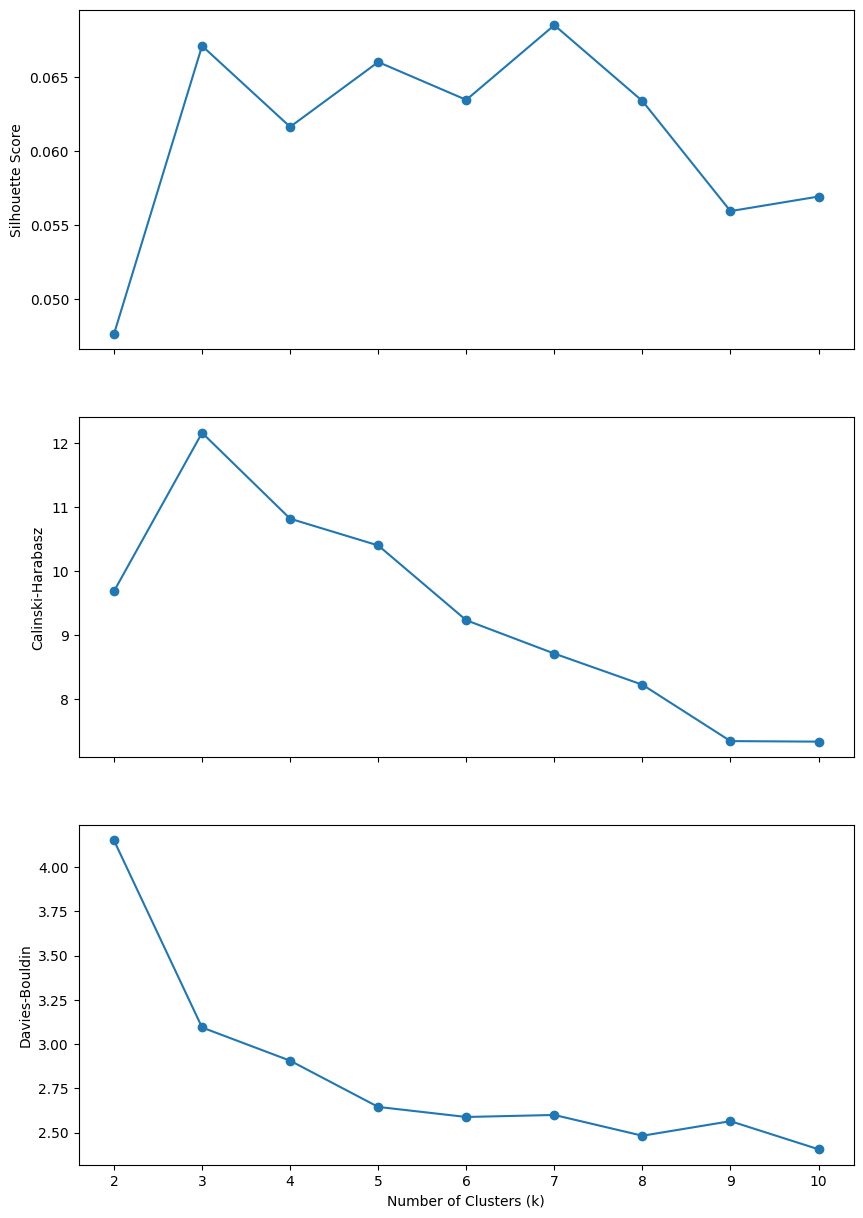

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def load_and_encode_data(f_path, nrows=500):
    # Load CSV file and drop rows with missing values
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # List of categorical feature column names for label encoding
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Encode each categorical feature into numeric form
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_features(df, tgt_name):
    # Select all feature columns except ID and target
    feat_cols = [col for col in df.columns if col not in ['User_ID', tgt_name]]

    # Convert selected features to NumPy array
    X = df[feat_cols].values

    # Scale features so each has mean 0 and variance 1
    X_scl = StandardScaler().fit_transform(X)

    return X_scl

def evaluate_kmeans_range(X, k_vals):
    # Store metric scores for each k value
    scores = {'Silhouette': [], 'Calinski-Harabasz': [], 'Davies-Bouldin': []}

    # Fit KMeans for each k and compute scores
    for k in k_vals:
        mdl = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        lbls = mdl.labels_

        scores['Silhouette'].append(silhouette_score(X, lbls))
        scores['Calinski-Harabasz'].append(calinski_harabasz_score(X, lbls))
        scores['Davies-Bouldin'].append(davies_bouldin_score(X, lbls))

    return scores

def plot_clustering_scores(k_vals, scores):
    # Create plots for each metric
    fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

    axes[0].plot(k_vals, scores['Silhouette'], marker='o')
    axes[0].set_ylabel('Silhouette Score')

    axes[1].plot(k_vals, scores['Calinski-Harabasz'], marker='o')
    axes[1].set_ylabel('Calinski-Harabasz')

    axes[2].plot(k_vals, scores['Davies-Bouldin'], marker='o')
    axes[2].set_ylabel('Davies-Bouldin')

    plt.xlabel('Number of Clusters (k)')
    plt.show()

if __name__ == "__main__":
    # Load and encode dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare scaled features
    X_scl = prepare_features(df, tgt_name="Stress_Level")

    # Split data, keeping only training features for clustering
    X_tr, _, _, _ = train_test_split(X_scl, df["Stress_Level"].values, test_size=0.3, random_state=42)

    # Evaluate KMeans for k from 2 to 10
    k_rng = range(2, 11)
    scores = evaluate_kmeans_range(X_tr, k_rng)

    # Plot metrics for each k
    plot_clustering_scores(k_rng, scores)

A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code. for k in range(2, 20): kmeans = KMeans(n_clusters=k).fit(X_train) distorsions.append(kmeans.inertia_) plot(distortions)

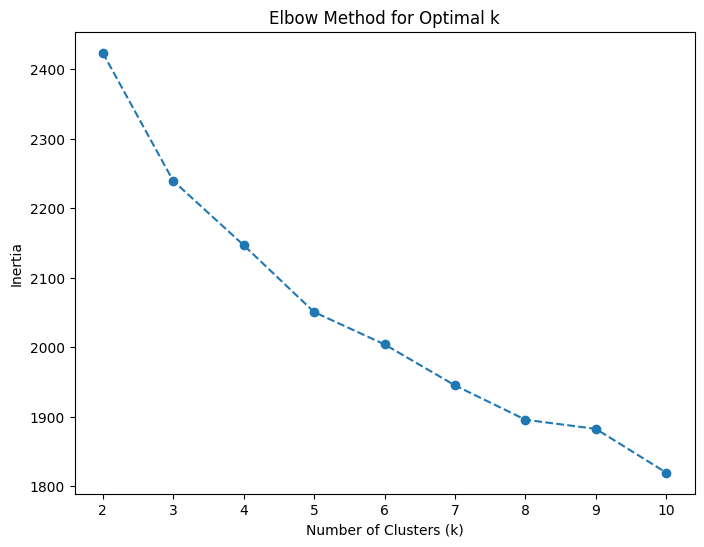

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

def load_and_encode_data(f_path, nrows=500):
    # Load CSV and drop missing rows
    df = pd.read_csv(f_path, nrows=nrows).dropna()

    # Categorical columns to label encode
    cat_feats = [
        'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity',
        'Consultation_History', 'Smoking_Habit', 'Alcohol_Consumption',
        'Medication_Usage', 'Diet_Quality', 'Stress_Level'
    ]

    # Encode categories into numeric values
    for col in cat_feats:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    return df

def prepare_features(df, tgt_name):
    # All columns except ID and target
    feat_cols = [col for col in df.columns if col not in ['User_ID', tgt_name]]

    # Convert to NumPy array
    X = df[feat_cols].values

    # Standardize feature values
    X_scl = StandardScaler().fit_transform(X)

    return X_scl

def compute_inertia_values(X, k_vals):
    # Inertia values for different k
    inertia_list = []
    for k in k_vals:
        mdl = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        inertia_list.append(mdl.inertia_)
    return inertia_list

def plot_elbow_method(k_vals, inertia_list):
    # Plot inertia vs k to find elbow point
    plt.figure(figsize=(8, 6))
    plt.plot(k_vals, inertia_list, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

if __name__ == "__main__":
    # Load and encode dataset
    df = load_and_encode_data("/content/MHDS.csv")

    # Prepare scaled features
    X_scl = prepare_features(df, tgt_name="Stress_Level")

    # Train-test split, keep only train features
    X_tr, _, _, _ = train_test_split(X_scl, df["Stress_Level"].values, test_size=0.3, random_state=42)

    # Range of k values to check
    k_rng = range(2, 11)

    # Compute inertia for each k
    inertia_vals = compute_inertia_values(X_tr, k_rng)

    # Plot elbow curve
    plot_elbow_method(k_rng, inertia_vals)

In [ ]:
    best_silhouette_k = k_range[np.argmax(clustering_scores['Silhouette'])]
    best_ch_k = k_range[np.argmax(clustering_scores['Calinski-Harabasz'])]
    best_db_k = k_range[np.argmin(clustering_scores['Davies-Bouldin'])]

    print(f"Best k according to Silhouette Score: {best_silhouette_k}")
    print(f"Best k according to Calinski-Harabasz Score: {best_ch_k}")
    print(f"Best k according to Davies-Bouldin Score: {best_db_k}")

Best k according to Silhouette Score: 7
Best k according to Calinski-Harabasz Score: 3
Best k according to Davies-Bouldin Score: 10
